In [1]:
# Install additional libraries
!pip install imbalanced-learn xgboost

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']
df = pd.read_csv(url, names=columns)
df.drop('Id', axis=1, inplace=True)

print(df.head())


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  GlassType
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0          1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0          1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0          1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0          1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0          1


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RI         214 non-null    float64
 1   Na         214 non-null    float64
 2   Mg         214 non-null    float64
 3   Al         214 non-null    float64
 4   Si         214 non-null    float64
 5   K          214 non-null    float64
 6   Ca         214 non-null    float64
 7   Ba         214 non-null    float64
 8   Fe         214 non-null    float64
 9   GlassType  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

Missing values:
 RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
GlassType    0
dtype: int64


/tmp/ipython-input-3-3299170860.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GlassType', data=df, palette='pastel')


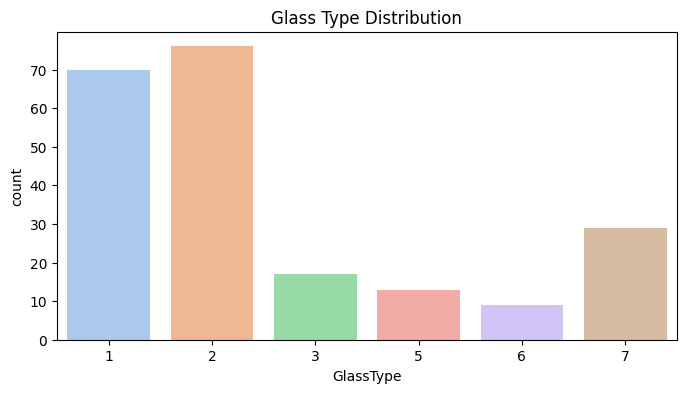

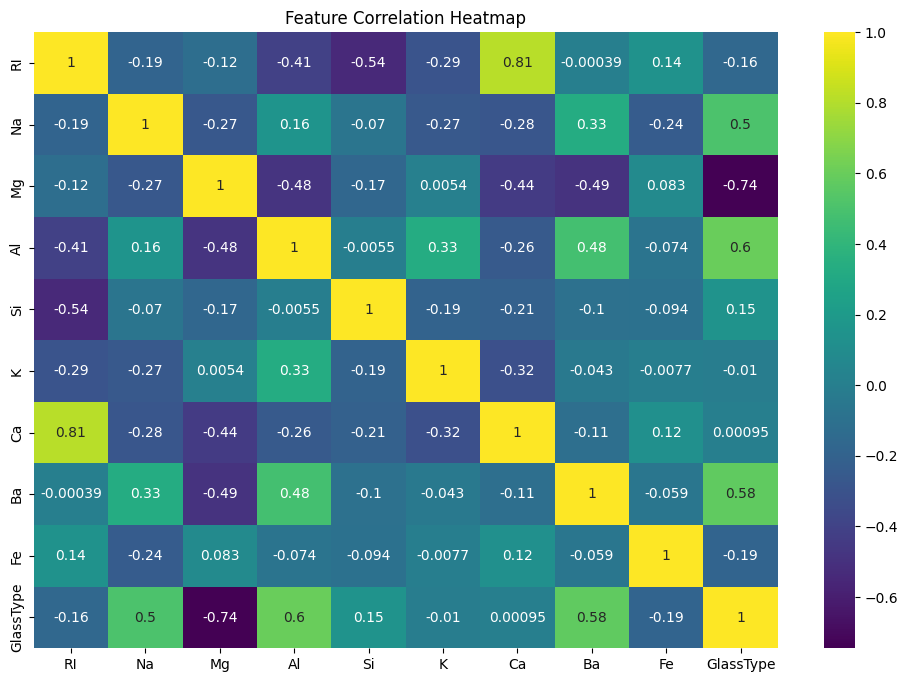

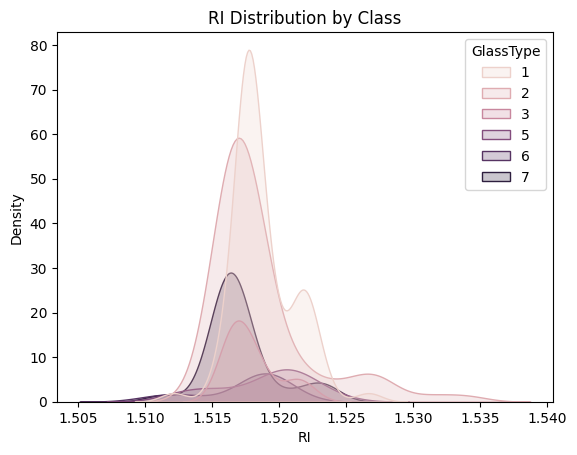

In [3]:
print("Dataset Info:")
print(df.info())

print("\nMissing values:\n", df.isnull().sum())

# Class distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='GlassType', data=df, palette='pastel')
plt.title("Glass Type Distribution")
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()

# KDE plots for a couple of features
sns.kdeplot(data=df, x='RI', hue='GlassType', fill=True)
plt.title("RI Distribution by Class")
plt.show()


In [4]:
X = df.drop('GlassType', axis=1)
y = df['GlassType']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=10)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE for balancing
smote = SMOTE(random_state=10)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [6]:
def evaluate(model, name):
    y_pred = model.predict(X_test_scaled)
    print(f"\n📊 {name} Classification Report")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



📊 Logistic Regression Classification Report
              precision    recall  f1-score   support

           1       0.60      0.50      0.55        18
           2       0.33      0.11      0.16        19
           3       0.10      0.50      0.17         4
           5       0.33      0.33      0.33         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         8

    accuracy                           0.44        54
   macro avg       0.56      0.57      0.53        54
weighted avg       0.53      0.44      0.45        54



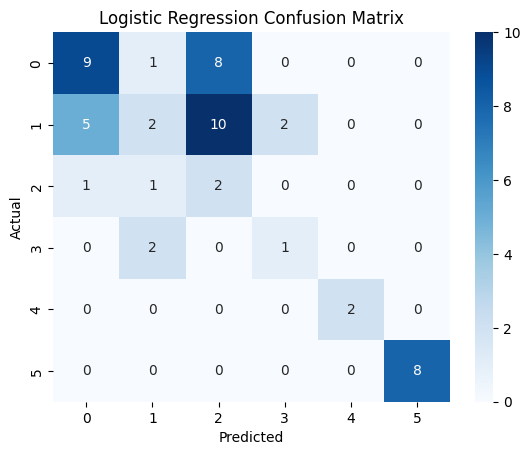

In [7]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_resampled, y_train_resampled)
evaluate(lr, "Logistic Regression")



📊 KNN Classification Report
              precision    recall  f1-score   support

           1       0.59      0.72      0.65        18
           2       0.60      0.32      0.41        19
           3       0.11      0.25      0.15         4
           5       0.25      0.33      0.29         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         8

    accuracy                           0.56        54
   macro avg       0.59      0.52      0.53        54
weighted avg       0.62      0.56      0.56        54



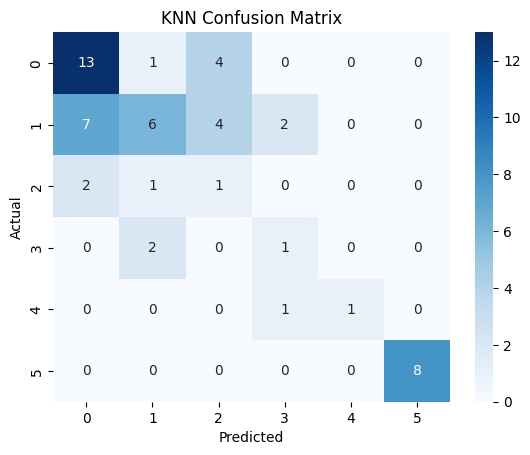

In [8]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_resampled, y_train_resampled)
evaluate(knn, "KNN")



📊 SVM Classification Report
              precision    recall  f1-score   support

           1       0.61      0.78      0.68        18
           2       0.70      0.37      0.48        19
           3       0.22      0.50      0.31         4
           5       0.50      0.33      0.40         3
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         8

    accuracy                           0.61        54
   macro avg       0.59      0.58      0.56        54
weighted avg       0.66      0.61      0.61        54



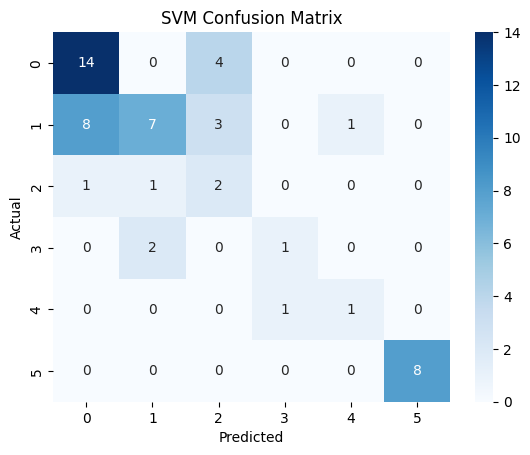

In [9]:
svm = SVC(C=1.0, kernel='poly', degree=3)
svm.fit(X_train_resampled, y_train_resampled)
evaluate(svm, "SVM")
